In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests, json
from tqdm import tqdm
import time


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




In [33]:
##### USE TQDM TO CHECK PROGRESS

In [45]:
#### USE COUNTY FIPS MASTER TO GET FIPS FOR EACH STATE AND COUNTY CODE

county_fips_master = pd.read_csv('county_fips_master.csv', encoding="ISO-8859-1")

fips_county_code_dict = {}

fips_state_code_dict = {}

county_fips_master = county_fips_master.dropna()


county_fips_master.state = county_fips_master.state.astype(int)
county_fips_master.county = county_fips_master.county.astype(int)


county_fips_master.dtypes

fipszip = zip(county_fips_master['fips'],county_fips_master['state'],county_fips_master['county'])

for fips,state,county in fipszip:
    fips_state_code_dict[fips] = state
    fips_county_code_dict[fips] = county
    

In [102]:
# ### GET AIR POLLUTION DATA INTO DATAFRAMES FROM API - DAY WISE SUMMARY, FIPS WISE AND YEAR WISE - 2011 - 2018

# aqi_data = []
# index = 0
# for year in tqdm(range(2011,2018)):
#     aqi_data.append([])
#     aqi_data[index] = pd.DataFrame(columns = ['fips','date','year','PM2.5'])
#     for fips in tqdm(fips_county_code_dict):
#         url = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=revanthg98@hotmail.com&key=sandram77&param=88101&bdate=" + str(year) + "0101&edate=" + str(year) + "1231&state=" + str(fips_state_code_dict[fips]).zfill(2) + "&county=" + str(fips_county_code_dict[fips]).zfill(3)
#         api_data = requests.get(url)
#         api_data = api_data.text
#         daily_data = json.loads(api_data)
        
#         if daily_data["Header"][0]["status"] == "Success":
#             for day in daily_data["Data"]:
#                 temp = {'fips':fips, 'date' : day['date_local'], 'year' : year, 'PM2.5' :day['arithmetic_mean']}
#                 aqi_data_len = len(aqi_data)
#                 aqi_data[index]= aqi_data[index].append(temp,ignore_index=True)
        

#     index+=1



        

In [154]:
### GET AIR POLLUTION DATA INTO DATAFRAMES FROM API - Year WISE SUMMARY, FIPS WISE AND YEAR WISE - 2011 - 2018

aqi_data = []
index = 0
aqi_data = pd.DataFrame(columns = ['fips','year','PM2.5'])
for year in tqdm(range(2011,2019)):
    for fips in tqdm(fips_county_code_dict):
        url = "https://aqs.epa.gov/data/api/annualData/byCounty?email==**********&key==**********&param=88101&bdate=" + str(year) + "0101&edate=" + str(year) + "1231&state=" + str(fips_state_code_dict[fips]).zfill(2) + "&county=" + str(fips_county_code_dict[fips]).zfill(3)
        api_data = requests.get(url)
        api_data = api_data.text
        daily_data = json.loads(api_data)
        
        if daily_data["Header"][0]["status"] == "Success":
            count = 0
            mean = 0 
            for day in daily_data["Data"]:
                count +=1
                mean += day['arithmetic_mean']
            mean /= count
            temp = {'fips':fips, 'year' : year, 'PM2.5' : mean}
            aqi_data = aqi_data.append(temp,ignore_index=True)
    time.sleep(5)


  6%|██▍                                     | 192/3142 [00:26<06:52,  7.16it/s]


 12%|████▉                                   | 386/3142 [00:53<06:16,  7.33it/s]


 18%|███████▍                                | 580/3142 [01:20<05:09,  8.28it/s]


 25%|█████████▊                              | 774/3142 [01:46<05:14,  7.53it/s]


 31%|████████████▎                           | 968/3142 [02:11<04:21,  8.30it/s]


 37%|██████████████▍                        | 1162/3142 [02:39<04:49,  6.85it/s]


 43%|████████████████▊                      | 1356/3142 [03:06<04:44,  6.28it/s]


 49%|███████████████████▏                   | 1550/3142 [03:32<03:16,  8.11it/s]


 56%|█████████████████████▋                 | 1744/3142 [03:56<02:56,  7.92it/s]


 62%|████████████████████████               | 1938/3142 [04:22<02:32,  7.92it/s]


 68%|██████████████████████████▍            | 2132/3142 [04:48<02:03,  8.16it/s]


 74%|████████████████████████████▊          | 2326/3142 [05:13<01:44,  7.80it/s]


 80%|███████████████████████████████▎       | 2520/3142 [05:41<01:24,  7.34it/s]


 86%|█████████████████████████████████▋     | 2714/3142 [06:08<00:53,  7.99it/s]


 93%|████████████████████████████████████   | 2908/3142 [06:34<00:35,  6.62it/s]


 99%|██████████████████████████████████████▌| 3102/3142 [06:59<00:04,  8.19it/s]


  5%|█▉                                      | 152/3142 [00:19<05:57,  8.36it/s]


 11%|████▍                                   | 346/3142 [00:46<05:37,  8.28it/s]


 17%|██████▊                                 | 540/3142 [01:11<05:34,  7.77it/s]


 23%|█████████▎                              | 734/3142 [01:36<05:15,  7.62it/s]


 30%|███████████▊                            | 928/3142 [02:01<04:40,  7.89it/s]


 36%|█████████████▉                         | 1122/3142 [02:26<04:17,  7.84it/s]


 42%|████████████████▎                      | 1316/3142 [02:51<04:46,  6.38it/s]


 48%|██████████████████▋                    | 1510/3142 [03:16<03:26,  7.91it/s]


 54%|█████████████████████▏                 | 1704/3142 [03:40<02:58,  8.07it/s]


 60%|███████████████████████▌               | 1898/3142 [04:06<02:32,  8.14it/s]


 67%|█████████████████████████▉             | 2092/3142 [04:32<02:28,  7.08it/s]


 73%|████████████████████████████▎          | 2286/3142 [04:57<01:46,  8.03it/s]


 79%|██████████████████████████████▊        | 2480/3142 [05:22<01:23,  7.95it/s]


 85%|█████████████████████████████████▏     | 2674/3142 [05:47<01:00,  7.70it/s]


 91%|███████████████████████████████████▌   | 2868/3142 [06:12<00:34,  8.04it/s]


 97%|██████████████████████████████████████ | 3062/3142 [06:37<00:10,  7.69it/s]


  4%|█▍                                      | 112/3142 [00:14<07:44,  6.52it/s]


 10%|███▉                                    | 306/3142 [00:41<05:52,  8.04it/s]


 16%|██████▎                                 | 500/3142 [01:06<05:55,  7.43it/s]


 22%|████████▊                               | 694/3142 [01:32<05:11,  7.87it/s]


 28%|███████████▎                            | 888/3142 [01:58<04:52,  7.70it/s]


 34%|█████████████▍                         | 1082/3142 [02:24<04:32,  7.57it/s]


 41%|███████████████▊                       | 1276/3142 [02:51<04:06,  7.56it/s]


 47%|██████████████████▏                    | 1470/3142 [03:17<08:08,  3.43it/s]


 53%|████████████████████▋                  | 1664/3142 [03:42<02:56,  8.36it/s]


 59%|███████████████████████                | 1858/3142 [04:07<02:43,  7.84it/s]


 65%|█████████████████████████▍             | 2052/3142 [04:33<02:34,  7.07it/s]


 71%|███████████████████████████▉           | 2246/3142 [04:59<02:26,  6.10it/s]


 78%|██████████████████████████████▎        | 2440/3142 [05:24<01:27,  8.00it/s]


 84%|████████████████████████████████▋      | 2634/3142 [05:49<01:07,  7.48it/s]


 90%|███████████████████████████████████    | 2828/3142 [06:14<00:40,  7.68it/s]


 96%|█████████████████████████████████████▌ | 3022/3142 [06:39<00:14,  8.15it/s]


  2%|▉                                        | 72/3142 [00:09<06:35,  7.75it/s]


  8%|███▍                                    | 266/3142 [00:35<06:29,  7.38it/s]


 15%|█████▊                                  | 460/3142 [01:01<05:46,  7.74it/s]


 21%|████████▎                               | 654/3142 [01:26<05:36,  7.40it/s]


 27%|██████████▊                             | 848/3142 [01:51<04:55,  7.75it/s]


 33%|████████████▉                          | 1042/3142 [02:16<04:29,  7.78it/s]


 39%|███████████████▎                       | 1236/3142 [02:41<04:18,  7.36it/s]


 46%|█████████████████▋                     | 1430/3142 [03:06<03:33,  8.03it/s]


 52%|████████████████████▏                  | 1624/3142 [03:30<03:32,  7.16it/s]


 58%|██████████████████████▌                | 1818/3142 [03:56<02:46,  7.96it/s]


 64%|████████████████████████▉              | 2012/3142 [04:21<02:28,  7.63it/s]


 70%|███████████████████████████▍           | 2206/3142 [04:46<02:00,  7.75it/s]


 76%|█████████████████████████████▊         | 2400/3142 [05:12<01:35,  7.81it/s]


 83%|████████████████████████████████▏      | 2594/3142 [05:37<01:21,  6.76it/s]


 89%|██████████████████████████████████▌    | 2788/3142 [06:01<00:48,  7.36it/s]


 95%|█████████████████████████████████████  | 2982/3142 [06:27<00:21,  7.49it/s]


  1%|▍                                        | 32/3142 [00:04<06:37,  7.83it/s]


  7%|██▉                                     | 226/3142 [00:30<08:07,  5.98it/s]


 13%|█████▎                                  | 420/3142 [00:56<06:13,  7.29it/s]


 20%|███████▊                                | 614/3142 [01:22<06:49,  6.18it/s]


 26%|██████████▎                             | 808/3142 [01:47<04:45,  8.18it/s]


 32%|████████████▍                          | 1002/3142 [02:12<04:34,  7.80it/s]


 38%|██████████████▊                        | 1196/3142 [02:37<04:28,  7.25it/s]


 44%|█████████████████▎                     | 1390/3142 [03:02<03:45,  7.77it/s]


 50%|███████████████████▋                   | 1584/3142 [03:27<03:15,  7.99it/s]


 57%|██████████████████████                 | 1778/3142 [03:52<03:13,  7.06it/s]


 63%|████████████████████████▍              | 1972/3142 [04:18<02:32,  7.69it/s]


 69%|██████████████████████████▉            | 2166/3142 [04:43<01:59,  8.20it/s]


 75%|█████████████████████████████▎         | 2360/3142 [05:09<01:41,  7.73it/s]


 81%|███████████████████████████████▋       | 2554/3142 [05:35<01:16,  7.67it/s]


 87%|██████████████████████████████████     | 2748/3142 [05:59<00:49,  7.91it/s]


 94%|████████████████████████████████████▌  | 2942/3142 [06:24<00:25,  7.74it/s]


100%|██████████████████████████████████████▉| 3136/3142 [06:50<00:00,  6.21it/s]


  6%|██▎                                     | 186/3142 [00:24<06:07,  8.04it/s]


 12%|████▊                                   | 380/3142 [00:51<06:27,  7.12it/s]


 18%|███████▎                                | 574/3142 [01:16<05:29,  7.78it/s]


 24%|█████████▊                              | 768/3142 [01:41<05:29,  7.20it/s]


 31%|████████████▏                           | 962/3142 [02:06<04:35,  7.90it/s]


 37%|██████████████▎                        | 1156/3142 [02:31<04:12,  7.87it/s]


 43%|████████████████▊                      | 1350/3142 [02:57<03:39,  8.15it/s]


 49%|███████████████████▏                   | 1544/3142 [03:22<03:27,  7.71it/s]


 55%|█████████████████████▌                 | 1738/3142 [03:46<03:00,  7.76it/s]


 61%|███████████████████████▉               | 1932/3142 [04:12<02:41,  7.50it/s]


 68%|██████████████████████████▍            | 2126/3142 [04:38<02:14,  7.54it/s]


 74%|████████████████████████████▊          | 2320/3142 [05:03<01:46,  7.74it/s]


 80%|███████████████████████████████▏       | 2514/3142 [05:29<01:26,  7.29it/s]


 86%|█████████████████████████████████▌     | 2708/3142 [05:54<00:55,  7.86it/s]


 92%|████████████████████████████████████   | 2902/3142 [06:19<00:31,  7.68it/s]


 99%|██████████████████████████████████████▍| 3096/3142 [06:44<00:06,  7.52it/s]


  5%|█▊                                      | 146/3142 [00:19<06:38,  7.51it/s]


 11%|████▎                                   | 340/3142 [00:46<06:00,  7.77it/s]


 17%|██████▊                                 | 534/3142 [01:11<05:44,  7.58it/s]


 23%|█████████▎                              | 728/3142 [01:37<05:07,  7.84it/s]


 29%|███████████▋                            | 922/3142 [02:02<04:33,  8.12it/s]


 36%|█████████████▊                         | 1116/3142 [02:27<04:16,  7.90it/s]


 42%|████████████████▎                      | 1310/3142 [02:53<03:51,  7.91it/s]


 48%|██████████████████▋                    | 1504/3142 [03:18<03:37,  7.53it/s]


 54%|█████████████████████                  | 1698/3142 [03:43<02:59,  8.04it/s]


 60%|███████████████████████▍               | 1892/3142 [04:08<02:30,  8.30it/s]


 66%|█████████████████████████▉             | 2086/3142 [04:34<02:23,  7.38it/s]


 73%|████████████████████████████▎          | 2280/3142 [05:00<01:58,  7.25it/s]


 79%|██████████████████████████████▋        | 2474/3142 [05:27<01:37,  6.88it/s]


 85%|█████████████████████████████████      | 2668/3142 [05:53<01:00,  7.89it/s]


 91%|███████████████████████████████████▌   | 2862/3142 [06:17<00:34,  8.16it/s]


 97%|█████████████████████████████████████▉ | 3056/3142 [06:42<00:10,  7.85it/s]


  3%|█▎                                      | 106/3142 [00:14<07:37,  6.64it/s]


 10%|███▊                                    | 300/3142 [00:40<06:02,  7.83it/s]


 16%|██████▎                                 | 494/3142 [01:05<05:39,  7.81it/s]


 22%|████████▊                               | 688/3142 [01:30<05:24,  7.55it/s]


 28%|███████████▏                            | 882/3142 [01:56<04:48,  7.82it/s]


 34%|█████████████▎                         | 1076/3142 [02:20<04:20,  7.92it/s]


 40%|███████████████▊                       | 1270/3142 [02:45<04:15,  7.33it/s]


 47%|██████████████████▏                    | 1464/3142 [03:10<03:31,  7.95it/s]


 53%|████████████████████▌                  | 1658/3142 [03:34<03:16,  7.57it/s]


 59%|██████████████████████▉                | 1852/3142 [03:59<02:46,  7.74it/s]


 65%|█████████████████████████▍             | 2046/3142 [04:24<02:29,  7.33it/s]


 71%|███████████████████████████▊           | 2240/3142 [04:50<01:59,  7.52it/s]


 77%|██████████████████████████████▏        | 2434/3142 [05:15<01:31,  7.73it/s]


 84%|████████████████████████████████▌      | 2628/3142 [05:40<01:06,  7.68it/s]


 90%|███████████████████████████████████    | 2822/3142 [06:05<00:43,  7.38it/s]


 96%|█████████████████████████████████████▍ | 3016/3142 [06:30<00:16,  7.77it/s]


100%|████████████████████████████████████████████| 8/8 [55:40<00:00, 417.61s/it]


In [155]:
print(aqi_data)

         fips    year      PM2.5
0      1003.0  2011.0   9.953913
1      1027.0  2011.0   10.60339
2      1033.0  2011.0  10.324348
3      1049.0  2011.0  11.185047
4      1055.0  2011.0  11.423684
...       ...     ...        ...
4751  56029.0  2018.0   4.189952
4752  56033.0  2018.0    6.44496
4753  56035.0  2018.0   5.504346
4754  56037.0  2018.0   5.357807
4755  56039.0  2018.0   4.786672

[4756 rows x 3 columns]


In [148]:
### GET AIR POLLUTION DATA INTO DATAFRAMES FROM API - Year WISE SUMMARY, State WISE AND YEAR WISE - 2011 - 2018


index = 0
i=0
aqi_data_state_wise = pd.DataFrame(columns = ['year','PM2.5'])
for year in tqdm(range(2011,2022)):
    states_count = 0
    states_mean = 0
    for state in tqdm(range(1,57)):
        url = "https://aqs.epa.gov/data/api/annualData/byState?email=**********&key=***********&param=88101&bdate=" + str(year) + "0101&edate=" + str(year) + "1231&state=" + str(state).zfill(2)
        api_data = requests.get(url)
        api_data = api_data.text
        yearly_data = json.loads(api_data)
        
        if yearly_data["Header"][0]["status"] == "Success":
            count = 0
            mean = 0
            for data in yearly_data["Data"]:
                count +=1
                mean += data['arithmetic_mean']
            mean /= count
            states_mean += mean
            states_count += 1
    states_mean /= states_count
    temp = {}
    temp = {'year' : year, 'PM2.5' : states_mean}
    aqi_data_state_wise = aqi_data_state_wise.append(temp,ignore_index=True)
    i+=1
    print(aqi_data_state_wise)


    

  9%|████                                        | 1/11 [00:25<04:10, 25.00s/it]

     year    PM2.5
0  2011.0  9.25178



 18%|████████                                    | 2/11 [00:48<03:39, 24.38s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762



 27%|████████████                                | 3/11 [01:13<03:14, 24.37s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074



 36%|████████████████                            | 4/11 [01:40<02:57, 25.29s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094



 45%|████████████████████                        | 5/11 [02:06<02:33, 25.61s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094
4  2015.0  8.165572



 55%|████████████████████████                    | 6/11 [02:31<02:07, 25.45s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094
4  2015.0  8.165572
5  2016.0  7.341667



 64%|████████████████████████████                | 7/11 [02:58<01:43, 25.98s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094
4  2015.0  8.165572
5  2016.0  7.341667
6  2017.0   7.66679



 73%|████████████████████████████████            | 8/11 [03:24<01:18, 26.06s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094
4  2015.0  8.165572
5  2016.0  7.341667
6  2017.0   7.66679
7  2018.0  7.618287



 82%|████████████████████████████████████        | 9/11 [03:50<00:51, 25.85s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094
4  2015.0  8.165572
5  2016.0  7.341667
6  2017.0   7.66679
7  2018.0  7.618287
8  2019.0  7.124257



 91%|███████████████████████████████████████    | 10/11 [04:15<00:25, 25.73s/it]

     year     PM2.5
0  2011.0   9.25178
1  2012.0  8.897762
2  2013.0   8.57074
3  2014.0  8.299094
4  2015.0  8.165572
5  2016.0  7.341667
6  2017.0   7.66679
7  2018.0  7.618287
8  2019.0  7.124257
9  2020.0  7.451889



100%|███████████████████████████████████████████| 11/11 [04:40<00:00, 25.52s/it]

      year     PM2.5
0   2011.0   9.25178
1   2012.0  8.897762
2   2013.0   8.57074
3   2014.0  8.299094
4   2015.0  8.165572
5   2016.0  7.341667
6   2017.0   7.66679
7   2018.0  7.618287
8   2019.0  7.124257
9   2020.0  7.451889
10  2021.0  8.061531


In [178]:
### GET AIR POLLUTION DATA INTO DATAFRAMES FROM API - Year WISE SUMMARY, County WISE AND YEAR WISE - 2011 - 2018


index = 0
i=0
aqi_data_county_wise = pd.DataFrame(columns = ['year','PM2.5'])
county_aqi_average_dict = {}
county_aqi_count_dict = {}
for fips in tqdm(fips_county_code_dict):
    county_aqi_average_dict[fips] = 0
    county_aqi_count_dict[fips] = 0
for year in tqdm(range(2011,2022)):
    counties_count = 0
    counties_mean = 0
    for fips in tqdm(fips_county_code_dict):
        
        url = "https://aqs.epa.gov/data/api/annualData/byCounty?email=*******&key=*********&param=88101&bdate=" + str(year) + "0101&edate=" + str(year) + "1231&state="  + str(fips_state_code_dict[fips]).zfill(2) + "&county=" + str(fips_county_code_dict[fips]).zfill(3)
        api_data = requests.get(url)
        api_data = api_data.text
        yearly_data = json.loads(api_data)
        
        if yearly_data["Header"][0]["status"] == "Success":
            
            count = 0
            mean = 0
            for data in yearly_data["Data"]:
                count +=1
                mean += data['arithmetic_mean']
            mean /= count
            county_aqi_average_dict[fips] += mean
            county_aqi_count_dict[fips]+= 1
            counties_mean += mean
            counties_count += 1
    counties_mean /= counties_count
    temp = {}
    temp = {'year' : year, 'PM2.5' : counties_mean}
    aqi_data_county_wise = aqi_data_county_wise.append(temp,ignore_index=True)
    i+=1
    print(aqi_data_county_wise)

for fips in (fips_county_code_dict):
    try:
        county_aqi_average_dict[fips] /= county_aqi_count_dict[fips]
    except ZeroDivisionError :
        county_aqi_average_dict[fips] = 0


  6%|██▍                                     | 191/3142 [00:24<06:20,  7.76it/s]


 12%|████▉                                   | 385/3142 [00:50<05:47,  7.93it/s]


 18%|███████▎                                | 579/3142 [01:15<05:17,  8.08it/s]


 25%|█████████▊                              | 773/3142 [01:40<05:02,  7.84it/s]


 31%|████████████▎                           | 967/3142 [02:04<04:25,  8.19it/s]


 37%|██████████████▍                        | 1161/3142 [02:29<03:58,  8.30it/s]


 43%|████████████████▊                      | 1355/3142 [02:54<03:45,  7.92it/s]


 49%|███████████████████▏                   | 1549/3142 [03:18<03:17,  8.08it/s]


 55%|█████████████████████▋                 | 1743/3142 [03:43<03:03,  7.62it/s]


 62%|████████████████████████               | 1937/3142 [04:08<02:31,  7.93it/s]


 68%|██████████████████████████▍            | 2131/3142 [04:33<02:07,  7.93it/s]


 74%|████████████████████████████▊          | 2325/3142 [04:58<01:40,  8.16it/s]


 80%|███████████████████████████████▎       | 2519/3142 [05:23<01:19,  7.81it/s]


 86%|█████████████████████████████████▋     | 2713/3142 [05:47<00:55,  7.74it/s]


 93%|████████████████████████████████████   | 2907/3142 [06:12<00:28,  8.32it/s]


 99%|██████████████████████████████████████▍| 3101/3142 [06:37<00:04,  8.38it/s]


  9%|███▋                                     | 1/11 [06:42<1:07:08, 402.81s/it]

     year     PM2.5
0  2011.0  9.461655



  6%|██▍                                     | 193/3142 [00:26<07:16,  6.75it/s]


 12%|████▉                                   | 387/3142 [00:54<06:13,  7.39it/s]


 18%|███████▍                                | 581/3142 [01:21<05:41,  7.50it/s]


 25%|█████████▊                              | 775/3142 [01:46<05:05,  7.74it/s]


 31%|████████████▎                           | 969/3142 [02:11<04:29,  8.07it/s]


 37%|██████████████▍                        | 1163/3142 [02:35<04:02,  8.15it/s]


 43%|████████████████▊                      | 1357/3142 [03:00<03:43,  7.97it/s]


 49%|███████████████████▎                   | 1551/3142 [03:25<03:16,  8.09it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:50<02:55,  7.96it/s]


 62%|████████████████████████               | 1939/3142 [04:15<02:32,  7.88it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:40<02:02,  8.24it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:05<01:48,  7.51it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:30<01:17,  8.05it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:55<00:51,  8.32it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:19<00:29,  7.85it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:44<00:05,  7.72it/s]


 18%|███████▍                                 | 2/11 [13:32<1:01:03, 407.03s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639



  6%|██▍                                     | 193/3142 [00:25<06:41,  7.34it/s]


 12%|████▉                                   | 387/3142 [00:52<05:51,  7.84it/s]


 18%|███████▍                                | 581/3142 [01:17<05:15,  8.12it/s]


 25%|█████████▊                              | 775/3142 [01:42<05:05,  7.74it/s]


 31%|████████████▎                           | 969/3142 [02:07<04:39,  7.77it/s]


 37%|██████████████▍                        | 1163/3142 [02:33<04:12,  7.83it/s]


 43%|████████████████▊                      | 1357/3142 [02:59<03:47,  7.85it/s]


 49%|███████████████████▎                   | 1551/3142 [03:24<03:20,  7.95it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:48<02:51,  8.13it/s]


 62%|████████████████████████               | 1939/3142 [04:14<02:27,  8.13it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:39<02:05,  8.04it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:04<01:49,  7.47it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:29<01:17,  8.04it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:54<00:53,  7.99it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:19<00:29,  7.77it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:44<00:04,  7.87it/s]


 27%|███████████▋                               | 3/11 [20:22<54:26, 408.31s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757



  6%|██▍                                     | 193/3142 [00:25<06:33,  7.49it/s]


 12%|████▉                                   | 387/3142 [00:52<05:39,  8.11it/s]


 18%|███████▍                                | 581/3142 [01:17<05:36,  7.61it/s]


 25%|█████████▊                              | 775/3142 [01:42<05:04,  7.77it/s]


 31%|████████████▎                           | 969/3142 [02:07<04:31,  8.00it/s]


 37%|██████████████▍                        | 1163/3142 [02:32<04:06,  8.02it/s]


 43%|████████████████▊                      | 1357/3142 [02:57<03:46,  7.88it/s]


 49%|███████████████████▎                   | 1551/3142 [03:22<03:17,  8.05it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:47<03:00,  7.73it/s]


 62%|████████████████████████               | 1939/3142 [04:13<02:28,  8.09it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:38<02:04,  8.09it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:02<01:45,  7.76it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:27<01:16,  8.09it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:52<00:55,  7.70it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:16<00:28,  8.15it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:41<00:04,  7.99it/s]


 36%|███████████████▋                           | 4/11 [27:08<47:32, 407.53s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041



  6%|██▍                                     | 193/3142 [00:24<06:41,  7.34it/s]


 12%|████▉                                   | 387/3142 [00:51<05:59,  7.66it/s]


 18%|███████▍                                | 581/3142 [01:16<05:59,  7.13it/s]


 25%|█████████▊                              | 775/3142 [01:42<05:02,  7.83it/s]


 31%|████████████▎                           | 969/3142 [02:07<04:33,  7.94it/s]


 37%|██████████████▍                        | 1163/3142 [02:31<04:14,  7.79it/s]


 43%|████████████████▊                      | 1357/3142 [02:57<03:41,  8.07it/s]


 49%|███████████████████▎                   | 1551/3142 [03:22<03:18,  8.01it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:46<02:53,  8.04it/s]


 62%|████████████████████████               | 1939/3142 [04:12<02:30,  8.01it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:37<02:05,  8.06it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:02<01:46,  7.66it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:27<01:20,  7.76it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:52<00:53,  8.03it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:16<00:28,  8.27it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:41<00:04,  8.09it/s]


 45%|███████████████████▌                       | 5/11 [33:56<40:44, 407.40s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041
4  2015.0  8.066962



  6%|██▍                                     | 193/3142 [00:24<06:40,  7.36it/s]


 12%|████▉                                   | 387/3142 [00:51<05:44,  7.99it/s]


 18%|███████▍                                | 581/3142 [01:15<05:29,  7.78it/s]


 25%|█████████▊                              | 775/3142 [01:40<04:51,  8.13it/s]


 31%|████████████▎                           | 969/3142 [02:05<04:31,  8.01it/s]


 37%|██████████████▍                        | 1163/3142 [02:30<04:12,  7.85it/s]


 43%|████████████████▊                      | 1357/3142 [02:55<03:40,  8.10it/s]


 49%|███████████████████▎                   | 1551/3142 [03:19<03:19,  7.97it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:44<02:57,  7.87it/s]


 62%|████████████████████████               | 1939/3142 [04:09<02:30,  8.01it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:35<02:05,  8.07it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:00<01:50,  7.37it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:25<01:13,  8.45it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:49<00:53,  8.03it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:14<00:29,  7.87it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:38<00:04,  7.94it/s]


 55%|███████████████████████▍                   | 6/11 [40:40<33:51, 406.27s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041
4  2015.0  8.066962
5  2016.0  7.260619



  6%|██▍                                     | 193/3142 [00:24<06:18,  7.79it/s]


 12%|████▉                                   | 387/3142 [00:50<05:43,  8.02it/s]


 18%|███████▍                                | 581/3142 [01:15<05:40,  7.52it/s]


 25%|█████████▊                              | 775/3142 [01:40<05:08,  7.68it/s]


 31%|████████████▎                           | 969/3142 [02:04<04:32,  7.99it/s]


 37%|██████████████▍                        | 1163/3142 [02:29<04:00,  8.24it/s]


 43%|████████████████▊                      | 1357/3142 [02:54<03:41,  8.04it/s]


 49%|███████████████████▎                   | 1551/3142 [03:18<03:13,  8.21it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:42<02:49,  8.24it/s]


 62%|████████████████████████               | 1939/3142 [04:07<02:24,  8.32it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:32<02:05,  8.06it/s]


 74%|████████████████████████████▉          | 2327/3142 [04:56<01:43,  7.90it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:21<01:20,  7.73it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:45<00:51,  8.26it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:10<00:28,  8.13it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:34<00:04,  8.23it/s]


 64%|███████████████████████████▎               | 7/11 [47:20<26:56, 404.21s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041
4  2015.0  8.066962
5  2016.0  7.260619
6  2017.0  7.690426



  6%|██▍                                     | 193/3142 [00:24<06:39,  7.39it/s]


 12%|████▉                                   | 387/3142 [00:50<05:27,  8.41it/s]


 18%|███████▍                                | 581/3142 [01:15<06:39,  6.41it/s]


 25%|█████████▊                              | 775/3142 [01:40<05:16,  7.47it/s]


 31%|████████████▎                           | 969/3142 [02:04<04:30,  8.03it/s]


 37%|██████████████▍                        | 1163/3142 [02:29<04:20,  7.59it/s]


 43%|████████████████▊                      | 1357/3142 [02:55<03:46,  7.87it/s]


 49%|███████████████████▎                   | 1551/3142 [03:19<03:10,  8.37it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:43<02:51,  8.15it/s]


 62%|████████████████████████               | 1939/3142 [04:08<02:22,  8.46it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:33<02:05,  8.04it/s]


 74%|████████████████████████████▉          | 2327/3142 [04:58<01:42,  7.98it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:22<01:16,  8.07it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:46<00:51,  8.31it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:11<00:29,  7.87it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:35<00:05,  7.78it/s]


 73%|███████████████████████████████▎           | 8/11 [54:01<20:09, 403.18s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041
4  2015.0  8.066962
5  2016.0  7.260619
6  2017.0  7.690426
7  2018.0  7.780528



  6%|██▍                                     | 193/3142 [00:24<06:36,  7.45it/s]


 12%|████▉                                   | 387/3142 [00:49<05:31,  8.31it/s]


 18%|███████▍                                | 581/3142 [01:13<05:23,  7.91it/s]


 25%|█████████▊                              | 775/3142 [01:38<05:02,  7.84it/s]


 31%|████████████▎                           | 969/3142 [02:03<04:30,  8.04it/s]


 37%|██████████████▍                        | 1163/3142 [02:27<04:00,  8.24it/s]


 43%|████████████████▊                      | 1357/3142 [02:52<03:41,  8.05it/s]


 49%|███████████████████▎                   | 1551/3142 [03:17<03:14,  8.17it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:42<03:00,  7.76it/s]


 62%|████████████████████████               | 1939/3142 [04:08<02:34,  7.77it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:34<02:13,  7.55it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:00<01:54,  7.14it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:28<01:38,  6.32it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:54<00:55,  7.74it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:20<00:30,  7.76it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:46<00:05,  7.60it/s]


 82%|█████████████████████████████████▌       | 9/11 [1:00:52<13:31, 405.77s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041
4  2015.0  8.066962
5  2016.0  7.260619
6  2017.0  7.690426
7  2018.0  7.780528
8  2019.0  7.155799



  6%|██▍                                     | 193/3142 [00:25<07:00,  7.01it/s]


 12%|████▉                                   | 387/3142 [00:52<05:44,  7.99it/s]


 18%|███████▍                                | 581/3142 [01:17<05:50,  7.30it/s]


 25%|█████████▊                              | 775/3142 [01:43<05:16,  7.48it/s]


 31%|████████████▎                           | 969/3142 [02:08<04:34,  7.93it/s]


 37%|██████████████▍                        | 1163/3142 [02:34<04:15,  7.76it/s]


 43%|████████████████▊                      | 1357/3142 [03:00<04:08,  7.17it/s]


 49%|███████████████████▎                   | 1551/3142 [03:25<03:23,  7.83it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:50<03:17,  7.07it/s]


 62%|████████████████████████               | 1939/3142 [04:16<02:31,  7.97it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:42<02:09,  7.82it/s]


 74%|████████████████████████████▉          | 2327/3142 [05:08<01:50,  7.40it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:33<01:17,  8.03it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:58<00:53,  7.95it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:23<00:28,  8.13it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:48<00:04,  7.92it/s]


 91%|████████████████████████████████████▎   | 10/11 [1:07:46<06:48, 408.18s/it]

     year     PM2.5
0  2011.0  9.461655
1  2012.0  8.800639
2  2013.0  8.568757
3  2014.0   8.40041
4  2015.0  8.066962
5  2016.0  7.260619
6  2017.0  7.690426
7  2018.0  7.780528
8  2019.0  7.155799
9  2020.0  7.642824



  6%|██▍                                     | 193/3142 [00:24<06:27,  7.61it/s]


 12%|████▉                                   | 387/3142 [00:50<05:39,  8.13it/s]


 18%|███████▍                                | 581/3142 [01:15<05:49,  7.34it/s]


 25%|█████████▊                              | 775/3142 [01:40<04:58,  7.94it/s]


 31%|████████████▎                           | 969/3142 [02:04<04:28,  8.08it/s]


 37%|██████████████▍                        | 1163/3142 [02:29<04:18,  7.65it/s]


 43%|████████████████▊                      | 1357/3142 [02:54<03:56,  7.55it/s]


 49%|███████████████████▎                   | 1551/3142 [03:19<03:20,  7.95it/s]


 56%|█████████████████████▋                 | 1745/3142 [03:44<02:55,  7.94it/s]


 62%|████████████████████████               | 1939/3142 [04:09<02:29,  8.07it/s]


 68%|██████████████████████████▍            | 2133/3142 [04:34<02:08,  7.87it/s]


 74%|████████████████████████████▉          | 2327/3142 [04:59<01:47,  7.62it/s]


 80%|███████████████████████████████▎       | 2521/3142 [05:24<01:17,  8.03it/s]


 86%|█████████████████████████████████▋     | 2715/3142 [05:48<00:53,  7.97it/s]


 93%|████████████████████████████████████   | 2909/3142 [06:13<00:29,  7.88it/s]


 99%|██████████████████████████████████████▌| 3103/3142 [06:38<00:04,  7.87it/s]


100%|████████████████████████████████████████| 11/11 [1:14:30<00:00, 406.37s/it]

      year     PM2.5
0   2011.0  9.461655
1   2012.0  8.800639
2   2013.0  8.568757
3   2014.0   8.40041
4   2015.0  8.066962
5   2016.0  7.260619
6   2017.0  7.690426
7   2018.0  7.780528
8   2019.0  7.155799
9   2020.0  7.642824
10  2021.0  8.196645


In [149]:
print(aqi_data_state_wise)

      year     PM2.5
0   2011.0   9.25178
1   2012.0  8.897762
2   2013.0   8.57074
3   2014.0  8.299094
4   2015.0  8.165572
5   2016.0  7.341667
6   2017.0   7.66679
7   2018.0  7.618287
8   2019.0  7.124257
9   2020.0  7.451889
10  2021.0  8.061531


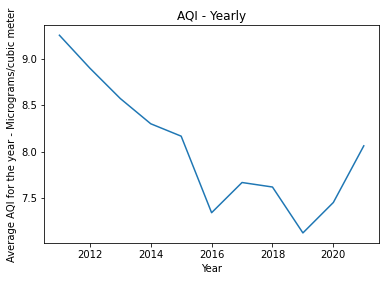

In [153]:
plt.plot(aqi_data_state_wise['year'],aqi_data_state_wise['PM2.5'])
plt.title('AQI - Yearly')
plt.xlabel('Year')
plt.ylabel('Average AQI for the year - Micrograms/cubic meter')
plt.show()

In [116]:
print(aqi_data_county_wise)

[     year     PM2.5
0  2021.0  7.345646, [], [], [], [], [], [], [], [], [], []]


In [ ]:
plt.plot(aqi_data_county_wise['year'],aqi_data_county_wise['PM2.5'])
plt.title('AQI - Yearly')
plt.xlabel('Year')
plt.ylabel('Average AQI for the year')
plt.show()

In [173]:
### USE FIPS FROM AIR POLLUTION AND YEAR, TO GET CENSUS DATA FROM 2011 TO 2018 IN SAME DATA FRAME

census_data = pd.read_csv('census_county_interpolated.csv', encoding="ISO-8859-1")
census_data = census_data.dropna()

census_with_aqi = pd.merge(census_data, aqi_data , on=["fips", "year"])

census_with_aqi = census_with_aqi.drop(['NAME', 'poverty_mcare', 'no_grad_mcare'], axis=1)
census_with_aqi = census_with_aqi.rename(columns={'land_area': 'LAND AREA', 'hispanic_pct': 'Percentage Hispanic','poverty': 'Poverty','population': 'Population','median_house_value': 'Median House Value','blk_pct': 'Percentage Black Population','white_pct': 'Percentage White Population','native_pct': 'Percentage Native Population','asian_pct': 'Percentage Asian Population','no_grad': 'Percentage Population with No Graduate Degree','median_household_income': 'Median Household Income','owner_occupied': 'Percentage Owner Occupied Houses','median_age': 'Median Age','age_pct_0_14': '0-14 Age Population Percent','age_pct_15_44': '15-44 Age Population Percent','age_pct_45_65': '45-65 Age Population Percent','age_pct_65_plus': '65+ Age Population Percent','population_density': 'Population Density'})
print(census_with_aqi)
census_with_aqi.dtypes

       fips    LAND AREA  year  Percentage Hispanic   Poverty  Population  \
0     31109   837.566633  2011             0.056675  0.143010    282931.0   
1     46099   806.834522  2011             0.040223  0.102954    168014.0   
2      1027   603.961036  2011             0.026981  0.187395     14010.0   
3     39003   402.503751  2011             0.023312  0.180196    106468.0   
4     55111   831.543002  2011             0.040160  0.096740     61504.0   
...     ...          ...   ...                  ...       ...         ...   
4751  34021   224.434019  2018             0.171848  0.113500    368762.0   
4752  42129  1028.040183  2018             0.011431  0.099993    354751.0   
4753  44003   168.558014  2018             0.046527  0.079636    163861.0   
4754  25011   699.222926  2018             0.038993  0.103665     70935.0   
4755  26091   749.633391  2018             0.079046  0.122190     98474.0   

      Median House Value  Percentage Black Population  \
0               14

fips                                              object
LAND AREA                                        float64
year                                              object
Percentage Hispanic                              float64
Poverty                                          float64
Population                                       float64
Median House Value                               float64
Percentage Black Population                      float64
Percentage White Population                      float64
Percentage Native Population                     float64
Percentage Asian Population                      float64
Percentage Population with No Graduate Degree    float64
Median Household Income                          float64
Percentage Owner Occupied Houses                 float64
Median Age                                       float64
0-14 Age Population Percent                      float64
15-44 Age Population Percent                     float64
45-65 Age Population Percent   

In [176]:
### RUN REGRESSION ON POLLUTION AND ALL CENSUS VARIABLES, TO SHOW THE IMPACT OF CENSUS VARIABELS ON POLLUTION
#multiple regression for variables until 2018, for USA  
                                              
           
features = ['LAND AREA','Population','Poverty','Median Household Income','Median Age','Population Density','Median House Value','Percentage Black Population','Percentage White Population','Percentage Native Population','Percentage Asian Population','Percentage Hispanic','Percentage Population with No Graduate Degree','Percentage Owner Occupied Houses','Median Age','0-14 Age Population Percent','15-44 Age Population Percent','45-65 Age Population Percent','65+ Age Population Percent']
label = ['PM2.5']
X = census_with_aqi[features]
Y = census_with_aqi[label]

import statsmodels.api as sm
from scipy import stats
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y.astype(float), X_new.astype(float))
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     77.92
Date:                Sat, 21 May 2022   Prob (F-statistic):          3.75e-238
Time:                        21:00:38   Log-Likelihood:                -9891.8
No. Observations:                4756   AIC:                         1.982e+04
Df Residuals:                    4738   BIC:                         1.994e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [166]:
### GET COVID DEATHS AND COVID CASES DATA
combined_deaths_data = []
fips_deaths_dict = {}
fips_cases_dict = {}
for fips in (fips_county_code_dict):
    fips_deaths_dict[fips] = 0
    fips_cases_dict[fips] = 0
# death_data_yearly = pd.read_csv('us-counties-2020.csv')

# combined_deaths_data = pd.DataFrame(columns = death_data_yearly.columns)

for year in tqdm(range(2020,2023)):
    death_data_yearly = pd.read_csv('us-counties-'+str(year)+'.csv')
    idx = 0
    for i in tqdm(range(len(death_data_yearly['fips']))):
        if death_data_yearly.iloc[i]['fips'] in fips_county_code_dict:
            fips_deaths_dict[death_data_yearly.iloc[i]['fips']] += (death_data_yearly.iloc[i]['deaths']-fips_deaths_dict[death_data_yearly.iloc[i]['fips']])
            idx+=1


  6%|█▉                                | 49227/884737 [00:19<05:34, 2497.14it/s]


 11%|███▋                             | 100373/884737 [00:39<05:25, 2413.30it/s]


 17%|█████▊                           | 154247/884737 [00:59<04:38, 2623.29it/s]


 24%|███████▊                         | 208680/884737 [01:19<04:03, 2773.30it/s]


 30%|█████████▊                       | 262779/884737 [01:39<03:51, 2689.93it/s]


 36%|███████████▊                     | 316745/884737 [01:59<03:33, 2660.07it/s]


 42%|█████████████▊                   | 371010/884737 [02:19<03:16, 2620.25it/s]


 48%|███████████████▊                 | 425267/884737 [02:39<02:49, 2704.44it/s]


 54%|█████████████████▉               | 479489/884737 [02:59<02:31, 2679.15it/s]


 60%|███████████████████▉             | 533990/884737 [03:19<02:03, 2831.79it/s]


 67%|█████████████████████▉           | 588371/884737 [03:39<01:50, 2679.86it/s]


 73%|███████████████████████▉         | 642479/884737 [03:59<01:31, 2637.49it/s]


 79%|█████████████████████████▉       | 696473/884737 [04:19<01:03, 2947.14it/s]


 85%|████████████████████████████     | 750702/884737 [05:52<01:01, 2177.75it/s]


 90%|█████████████████████████████▊   | 800136/884737 [06:12<00:34, 2477.07it/s]


 96%|███████████████████████████████▊ | 853118/884737 [06:32<00:11, 2666.40it/s]


  2%|▌                                | 21503/1185373 [00:07<07:13, 2685.35it/s]


  6%|██                               | 72341/1185373 [00:28<07:11, 2582.19it/s]


 10%|███▎                            | 123238/1185373 [00:48<06:59, 2531.02it/s]


 15%|████▋                           | 173091/1185373 [01:08<06:22, 2648.48it/s]


 19%|██████                          | 222548/1185373 [01:29<08:41, 1845.57it/s]


 23%|███████▎                        | 271603/1185373 [01:49<06:07, 2484.22it/s]


 27%|████████▊                       | 325364/1185373 [02:09<05:28, 2614.07it/s]


 32%|██████████▏                     | 375066/1185373 [02:30<05:59, 2253.19it/s]


 36%|███████████▍                    | 425631/1185373 [02:51<05:24, 2338.46it/s]


 40%|████████████▊                   | 475910/1185373 [03:11<05:13, 2266.22it/s]


 44%|██████████████▏                 | 526083/1185373 [03:31<04:15, 2575.92it/s]


 49%|███████████████▌                | 575492/1185373 [03:52<04:24, 2305.38it/s]


 53%|████████████████▉               | 626006/1185373 [04:12<03:19, 2800.34it/s]


 57%|██████████████████▏             | 675925/1185373 [04:33<04:50, 1755.76it/s]


 61%|███████████████████▌            | 722933/1185373 [04:53<02:59, 2579.69it/s]


 65%|████████████████████▉           | 774462/1185373 [05:14<02:37, 2615.05it/s]


 70%|██████████████████████▎         | 825692/1185373 [05:34<02:14, 2669.59it/s]


 74%|███████████████████████▋        | 876775/1185373 [05:54<01:59, 2589.89it/s]


 78%|█████████████████████████       | 928390/1185373 [06:14<01:36, 2654.38it/s]


 83%|██████████████████████████▍     | 979568/1185373 [06:34<01:23, 2453.25it/s]


 87%|███████████████████████████▊    | 1028466/1185373 [06:55<03:02, 858.71it/s]


 91%|████████████████████████████▏  | 1076408/1185373 [07:15<00:45, 2391.95it/s]


 95%|█████████████████████████████▍ | 1127068/1185373 [07:35<00:23, 2523.90it/s]


 99%|██████████████████████████████▊| 1176946/1185373 [07:56<00:03, 2591.95it/s]


 13%|████▍                             | 42954/328512 [00:16<02:09, 2206.88it/s]


 29%|█████████▋                        | 93931/328512 [00:36<01:26, 2727.67it/s]


 43%|██████████████▎                  | 141979/328512 [00:57<01:15, 2472.42it/s]


 59%|███████████████████▍             | 193378/328512 [01:17<00:51, 2642.77it/s]


 74%|████████████████████████▍        | 243303/328512 [01:37<00:30, 2813.01it/s]


 90%|█████████████████████████████▌   | 294317/328512 [01:58<00:13, 2513.03it/s]


100%|████████████████████████████████████████████| 3/3 [16:56<00:00, 338.75s/it]


In [190]:
covid_deaths_dataframe = pd.DataFrame(columns=['fips','year','deaths'])

for fips in fips_county_code_dict:
    covid_deaths_dataframe.loc[len(covid_deaths_dataframe.index)] = [fips,2018,fips_deaths_dict[fips]]

    
county_aqi_dataframe = pd.DataFrame(columns=['fips','year','average_aqi'])

for fips in fips_county_code_dict:
    if county_aqi_average_dict[fips] > 0:
        county_aqi_dataframe.loc[len(county_aqi_dataframe.index)] = [fips,2018,county_aqi_average_dict[fips]]
        
county_aqi_deaths = pd.merge(county_aqi_dataframe, covid_deaths_dataframe, on=["fips", "year"])
county_aqi_deaths = pd.merge(county_aqi_deaths, census_with_aqi, on=["fips", "year"])
print(county_aqi_deaths)

        fips    year  average_aqi  deaths     LAND AREA  Percentage Hispanic  \
0     1003.0  2018.0     8.138226   677.0   1589.793727             0.044943   
1     1027.0  2018.0     8.010829    81.0    603.961036             0.031021   
2     1033.0  2018.0     8.378490   260.0    592.744955             0.024755   
3     1049.0  2018.0     8.487840   326.0    777.098766             0.143539   
4     1055.0  2018.0     8.908577   641.0    535.281864             0.037692   
..       ...     ...          ...     ...           ...                  ...   
621  56029.0  2018.0     4.272539   142.0   6939.038982             0.054325   
622  56033.0  2018.0     6.208170    78.0   2523.361154             0.041717   
623  56035.0  2018.0     4.575213    27.0   4886.481716             0.073460   
624  56037.0  2018.0     4.778356   124.0  10426.980451             0.159621   
625  56039.0  2018.0     4.546109    16.0   3996.846434             0.148879   

      Poverty  Population  Median House

In [193]:
### RUN REGRESSION ON COVID DEATHS AND CASES, COUNTY WISE, USING AIR POLLUTION AND CENSUS VARIABLES
features = ['average_aqi','LAND AREA','Population','Poverty','Median Household Income','Median Age','Population Density','Median House Value','Percentage Black Population','Percentage White Population','Percentage Native Population','Percentage Asian Population','Percentage Hispanic','Percentage Population with No Graduate Degree','Percentage Owner Occupied Houses','Median Age','0-14 Age Population Percent','15-44 Age Population Percent','45-65 Age Population Percent','65+ Age Population Percent']
label = ['deaths']
X = county_aqi_deaths[features]
Y = county_aqi_deaths[label]

import statsmodels.api as sm
from scipy import stats
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y.astype(float), X_new.astype(float))
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     398.2
Date:                Sat, 21 May 2022   Prob (F-statistic):          7.76e-322
Time:                        22:39:27   Log-Likelihood:                -4835.5
No. Observations:                 626   AIC:                             9709.
Df Residuals:                     607   BIC:                             9793.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------